# Loading the data

In [ ]:
import pandas as pd
import seaborn as sns
import nltk

In [ ]:
financial_data = pd.read_csv("/content/drive/MyDrive/Bachelor Scriptie KI/FinancialPhraseBank-v1.0/Sentences_50Agree.txt", sep="@", names=["Sentence", "Sentiment"], encoding="latin-1")

In [ ]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   4846 non-null   object
 1   Sentiment  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
financial_data.describe()

,Sentence,Sentiment
count,4846,4846
unique,4838,3
top,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...,neutral
freq,2,2879


In [ ]:
financial_data.head()

,Sentence,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


In [ ]:
financial_data.Sentiment

0        neutral
1        neutral
2       negative
3       positive
4       positive
          ...   
4841    negative
4842     neutral
4843    negative
4844    negative
4845    negative
Name: Sentiment, Length: 4846, dtype: object

# Exploratory Data Analysis

<Axes: xlabel='Sentiment', ylabel='count'>

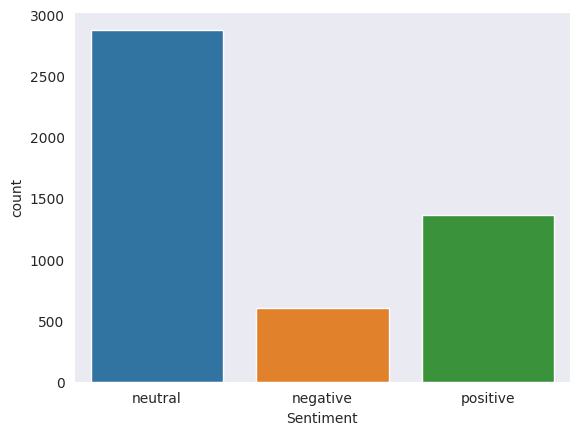

In [ ]:
sns.set_style("dark")
sns.countplot(financial_data, x="Sentiment")

From the plot above, we can see that most of the sentences in the dataset were labeled as 'neutral'. Moreover, there are about 2 times as many positive sentences as there are negative ones.



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
x = financial_data.Sentence
y = []
for sent in x:
  y.append(len(sent))

Text(0, 0.5, 'Number of sentences')

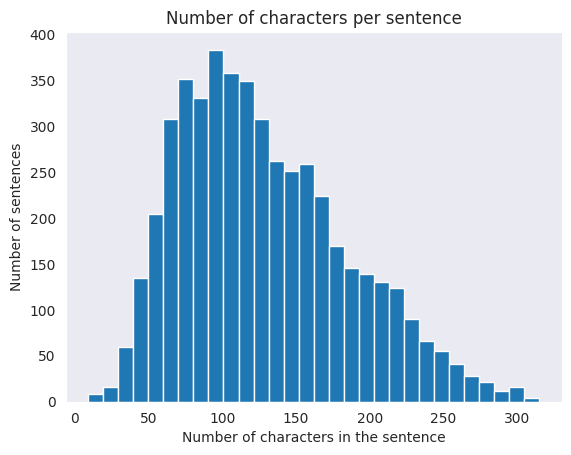

In [ ]:
plt.hist(y, bins = 30)
plt.title("Number of characters per sentence")
plt.xlabel("Number of characters in the sentence")
plt.ylabel("Number of sentences")

As we can see from the plot above, most sentences have 15-25 characters.

# Data Pre-Processing

## Tokenize and make lowercase

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def remove_punctuation(tokenized_sent):
  """
  Function that removes certain unwanted characters from a tokenized sentence, specified in the set 'punctuation'
  Returns the cleaned-up tokenized sentence.

  param tokenized_sent: list of tokens, still containing punctuation.
  """
  punctuation = {'!', '#', '&', '(', ')', ',', ':', ';', '?', '[', ']', '@', '.'}
  new = []
  for token in tokenized_sent:
    if not token in punctuation:
      new.append(token)
  return new

In [ ]:
def tokenize_and_clean(dataframe):
  """
  Given a dataframe with sentences, tokenize and clean them.

  param dataframe: Pandas DataFrame containing sentences.
  """
  i = 0
  for sentence in dataframe.Sentence:
    tokenized = word_tokenize(sentence)
    clean = remove_punctuation(tokenized)
    dataframe.Sentence[i] = clean
    i += 1

In [ ]:
#Tokenize and clean the sentences in financial_data. The function doesn't return anything, but edits the existing dataframe.
print(financial_data.head())
tokenize_and_clean(financial_data)
print(financial_data.head())

                                            Sentence Sentiment
0  According to Gran , the company has no plans t...   neutral
1  Technopolis plans to develop in stages an area...   neutral
2  The international electronic industry company ...  negative
3  With the new production plant the company woul...  positive
4  According to the company 's updated strategy f...  positive
                                            Sentence Sentiment
0  [According, to, Gran, the, company, has, no, p...   neutral
1  [Technopolis, plans, to, develop, in, stages, ...   neutral
2  [The, international, electronic, industry, com...  negative
3  [With, the, new, production, plant, the, compa...  positive
4  [According, to, the, company, 's, updated, str...  positive


In [ ]:
#Some additional tests to check that the data has been tokenized correctly
print(type(financial_data.Sentence[0]))
print(financial_data.Sentence[0])
print(financial_data.Sentence[37])

<class 'list'>
['According', 'to', 'Gran', 'the', 'company', 'has', 'no', 'plans', 'to', 'move', 'all', 'production', 'to', 'Russia', 'although', 'that', 'is', 'where', 'the', 'company', 'is', 'growing']
['Aspo', 'Plc', 'STOCK', 'EXCHANGE', 'RELEASE', 'February', '11', '2011', 'at8', '.45', 'a.m.', 'ESL', 'Shipping', 'Ltd', 'part', 'of', 'Aspo', 'Group', 'has', 'signed', 'a', 'new', 'long-term', 'contract', 'with', 'Rautaruukki', 'Corporation', 'for', 'the', 'marine', 'transport', 'of', 'raw', 'materials', 'on', 'the', 'Baltic', 'Sea']


In [ ]:
def wordcount(dataframe):
  """
  Counts the lengths of the sentences in the dataframe.

  param dataframe: Pandas DataFrame containing the sentences.
  """
  wordcounter = []
  for sentence in dataframe.Sentence:
    counter = 0
    for word in sentence:
      counter += 1
    wordcounter.append(counter)
  return wordcounter

In [ ]:
word_amounts = wordcount(financial_data)

Text(0, 0.5, 'Number of sentences')

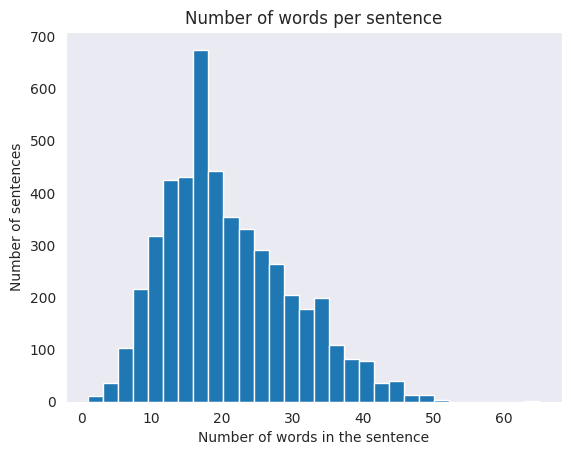

In [ ]:
plt.hist(word_amounts, bins = 30)
plt.title("Number of words per sentence")
plt.xlabel("Number of words in the sentence")
plt.ylabel("Number of sentences")

In [ ]:
def convert_to_lower(dataframe):
  """
  Converts all sentences in a dataframe to lowercase.

  param dataframe: Pandas DataFrame containing the sentences.
  """
  i = 0
  for row in dataframe.Sentence:
    lowered = [w.lower() for w in row]
    dataframe.Sentence[i] = lowered
    i += 1

In [ ]:
print(financial_data.head())
convert_to_lower(financial_data)
print(financial_data.head())

                                            Sentence Sentiment
0  [According, to, Gran, the, company, has, no, p...   neutral
1  [Technopolis, plans, to, develop, in, stages, ...   neutral
2  [The, international, electronic, industry, com...  negative
3  [With, the, new, production, plant, the, compa...  positive
4  [According, to, the, company, 's, updated, str...  positive
                                            Sentence Sentiment
0  [according, to, gran, the, company, has, no, p...   neutral
1  [technopolis, plans, to, develop, in, stages, ...   neutral
2  [the, international, electronic, industry, com...  negative
3  [with, the, new, production, plant, the, compa...  positive
4  [according, to, the, company, 's, updated, str...  positive


We have now tokenized the sentences, removed the punctuation and made all words lowercase. It is now possible to analyze the most occuring words, before we remove the stopwords. After that, we can do the same thing again, but then without including the stopwords.

In [ ]:
#Analyze the most occuring stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import defaultdict

def get_stopword_counts(dataframe):
  counter = defaultdict(int)
  for sent in dataframe.Sentence:
    for token in sent:
      if token in stopwords.words('english'):
        counter[token] += 1
  return counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopword_counts = get_stopword_counts(financial_data)

Text(0, 0.5, 'The amount of occurences')

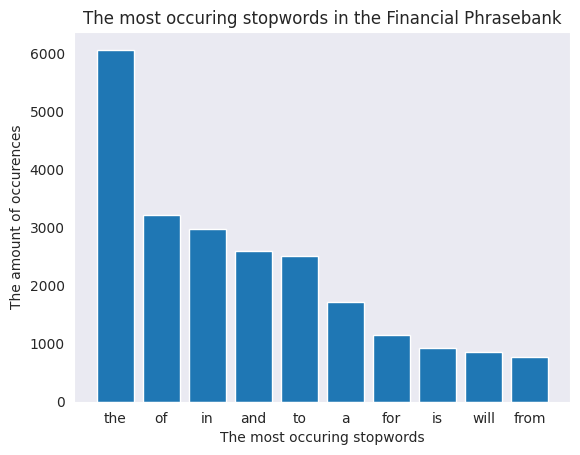

In [ ]:
top=sorted(stopword_counts.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)
plt.title("The most occuring stopwords in the Financial Phrasebank")
plt.xlabel("The most occuring stopwords")
plt.ylabel("The amount of occurences")

The graph above shows the most occuring stopwords and how often they occur.

Before we remove the stopwords, let's see how many unique words occur in the dataset.

In [ ]:
def make_BOW(dataframe):
  """
  Given sentences in the dataframe, create a list containing all words occuring in the dataset.

  param dataframe: Pandas DataFrame containing the sentences.
  """
  bag = []
  for sent in dataframe.Sentence:
    for word in sent:
      bag.append(word)
  return bag


def count_unique_words(BOW):
  """
  Given a list of words, count how many time each word occurs.

  param BOW: list of words occuring in the dataset.
  """
  counts = {}
  for word in BOW:
    if word in counts:
      counts[word] += 1
    else:
      counts[word] = 1

  unique = 0
  for item in counts:
    unique += 1
  return unique

In [ ]:
financial_BOW = make_BOW(financial_data)
financial_BOW

In [ ]:
count_unique_words(financial_BOW)

11691

So the dataset contains 11,691 unique words.
We only did this after converting the words to lowercase, since otherwise 'Like' and 'like' would have been counted double.

## Remove stopwords

We will now remove the stopwords from the sentences, to end up with only the meaningful words.

In [ ]:
def remove_stopwords(dataframe):
  """
  Given a dataframe with tokenized sentences, remove the stopwords.

  param dataframe: Pandas DataFrame containing tokenized sentences with stopwords.
  """
  j = 0
  for row in dataframe.Sentence:
    temp = []
    for w in row:
      if w not in stopwords.words('english'):
        temp.append(w)
    dataframe.Sentence[j] = temp
    j += 1

In [ ]:
print(financial_data.head())
remove_stopwords(financial_data)
print(financial_data.head())

                                            Sentence Sentiment
0  [according, to, gran, the, company, has, no, p...   neutral
1  [technopolis, plans, to, develop, in, stages, ...   neutral
2  [the, international, electronic, industry, com...  negative
3  [with, the, new, production, plant, the, compa...  positive
4  [according, to, the, company, 's, updated, str...  positive
                                            Sentence Sentiment
0  [according, gran, company, plans, move, produc...   neutral
1  [technopolis, plans, develop, stages, area, le...   neutral
2  [international, electronic, industry, company,...  negative
3  [new, production, plant, company, would, incre...  positive
4  [according, company, 's, updated, strategy, ye...  positive


Before continuing, we will first save the cleaned dataset. This will allow us to quickly load it when applying the models, instead of having to do the preprocessing all over again.

In [ ]:
#Since VADER needs the full sentences, we will join the tokenized sentences.
sentences = []
for sentence in financial_data.Sentence:
  combined = ' '.join(sentence)
  sentences.append(combined)

['according gran company plans move production russia although company growing', 'technopolis plans develop stages area less 100,000 square meters order host companies working computer technologies telecommunications statement said', 'international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported', 'new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability', "according company 's updated strategy years 2009-2012 basware targets long-term net sales growth range 20 % -40 % operating profit margin 10 % -20 % net sales", "financing aspocomp 's growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs", "last quarter 2010 componenta 's net sales doubled eur131m eur76m period year earlier moved zero pre-ta

In [ ]:
sentiments = []
for sentiment in financial_data.Sentiment:
  sentiments.append(sentiment)

In [ ]:
data_dict = {'Sentence': sentences, 'Sentiment': sentiments}
proper_df = pd.DataFrame(data=data_dict)

In [ ]:
proper_df

,Sentence,Sentiment
0,according gran company plans move production r...,neutral
1,technopolis plans develop stages area less 100...,neutral
2,international electronic industry company elco...,negative
3,new production plant company would increase ca...,positive
4,according company 's updated strategy years 20...,positive
...,...,...
4841,london marketwatch -- share prices ended lower...,negative
4842,rinkuskiai 's beer sales fell 6.5 per cent 4.1...,neutral
4843,operating profit fell eur 35.4 mn eur 68.8 mn ...,negative
4844,net sales paper segment decreased eur 221.6 mn...,negative


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Bachelor Scriptie KI/Programming/findat_clean_nonlem.csv'
with open(path, 'w', encoding = 'latin-1') as f:
  proper_df.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
read_test = pd.read_csv("/content/drive/My Drive/Bachelor Scriptie KI/Programming/findat_clean_nonlem.csv", sep=",", names=["Sentence", "Sentiment"], encoding="latin-1", skiprows=[0])

In [ ]:
read_test

,Sentence,Sentiment
0,according gran company plans move production r...,neutral
1,technopolis plans develop stages area less 100...,neutral
2,international electronic industry company elco...,negative
3,new production plant company would increase ca...,positive
4,according company 's updated strategy years 20...,positive
...,...,...
4841,london marketwatch -- share prices ended lower...,negative
4842,rinkuskiai 's beer sales fell 6.5 per cent 4.1...,neutral
4843,operating profit fell eur 35.4 mn eur 68.8 mn ...,negative
4844,net sales paper segment decreased eur 221.6 mn...,negative


We will now count the most occuring stopwords.

In [ ]:
def get_non_stopword_counts(dataframe):
  """
  Given a dataframe with tokenized sentences, count how many non-stopwords occur.

  param dataframe: Pandas DataFrame containing the sentences.
  """
  counter = defaultdict(int)
  for sent in dataframe.Sentence:
    for token in sent:
      if token not in stopwords.words('english'):
        counter[token] += 1
  return counter

In [ ]:
non_stopword_counts = get_non_stopword_counts(financial_data)

Text(0, 0.5, 'The amount of occurences')

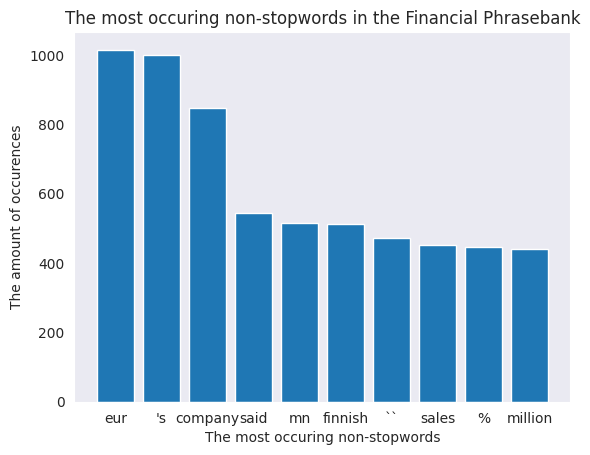

In [ ]:
top=sorted(non_stopword_counts.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)
plt.title("The most occuring non-stopwords in the Financial Phrasebank")
plt.xlabel("The most occuring non-stopwords")
plt.ylabel("The amount of occurences")

In the plot above, we can see the most occuring words in the dataset that are not stopwords. Due to the way the sentences are strucured, it is quite difficult to get clean words. For instance, in front of the 's, there always a space, giving us 's as a separate (and often occuring) 'word'. However, we can see that 'eur' (as in for instance 300 million euro) often occurs, in addition to the words company and said. Hence, the top occuring words are what we'd expect from financial data.

## Stemming / Lemmatization

At this point, we only have the most important words, lowercased and without punctuation of each sentence. Now, for the lexicon-based approach, it might be necessary to perform either stemming or lemmatization to facilitate the lookup in the corpus.

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def lemmatize_data(dataframe):
  """
  Apply the lemmatizer to the tokenized sentences in the dataframe.

  param dataframe: Pandas DataFrame containing the sentences.
  """
  i = 0
  lemmatizer = WordNetLemmatizer()
  for row in dataframe.Sentence:
    new = []
    for word in row:
      new.append(lemmatizer.lemmatize(word))
    dataframe.Sentence[i] = new
    i += 1

In [ ]:
testje = {"Sentence": [["according", "to", "gran", "the", "company", "has", "no"], ["new", "production", "plant", "company", "would"]], "Sentiment": ["positive", "neutral"]}
testdf = pd.DataFrame(data=testje)
testdf

,Sentence,Sentiment
0,"[according, to, gran, the, company, has, no]",positive
1,"[new, production, plant, company, would]",neutral


In [ ]:
print(testdf)
lemmatize_data(testdf)
print(testdf)

                                       Sentence Sentiment
0  [according, to, gran, the, company, has, no]  positive
1      [new, production, plant, company, would]   neutral
                                      Sentence Sentiment
0  [according, to, gran, the, company, ha, no]  positive
1     [new, production, plant, company, would]   neutral


Lemmatization sometimes gives weird results, such as in the case above where 'has' gets shortened to 'ha'

Therefore, let's try stemming in the following.

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
def stem_data(dataframe):
  """
  Apply the stemmer to the tokenized sentences in the dataframe.

  param dataframe: Pandas DataFrame containing the sentences.
  """
  i = 0
  stemmer = PorterStemmer()
  for row in dataframe.Sentence:
    new = []
    for word in row:
      new.append(stemmer.stem(word))
    dataframe.Sentence[i] = new
    i += 1

In [ ]:
print(testdf)
stem_data(testdf)
print(testdf)

                                      Sentence Sentiment
0  [according, to, gran, the, company, ha, no]  positive
1     [new, production, plant, company, would]   neutral
                                   Sentence Sentiment
0  [accord, to, gran, the, compani, ha, no]  positive
1     [new, product, plant, compani, would]   neutral


Both stemming and lemmatization give unsatisfying results. Have to see whether we need to use it, or if it instead worsens performance.

#N-gram analysis and Wordcloud

##N-grams

In [ ]:
#The corpus just is a big list containing all words occuring in the dataset (these include doubles)
corpus = []
corpus=[word for sent in financial_data.Sentence for word in sent]

In [ ]:
print(len(corpus))

66775


In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def get_top_ngram(corpus, n=2):
  """
  Given a corpus of words, extract the most occuring n-grams.

  param corpus: (list) containing all words in the dataset.
  param n: (int) the lenght of n-grams we want (2 means bigrams).
  """
  vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx])
                for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:10]

In [ ]:
top_bigrams = get_top_ngram(corpus)

In [ ]:
print(top_bigrams)

[('year on', 35), ('on year', 34), ('non recurring', 28), ('long term', 27), ('upm kymmene', 21), ('lay offs', 17), ('finland based', 16), ('january september', 15), ('12 month', 15), ('january june', 13)]


<Axes: >

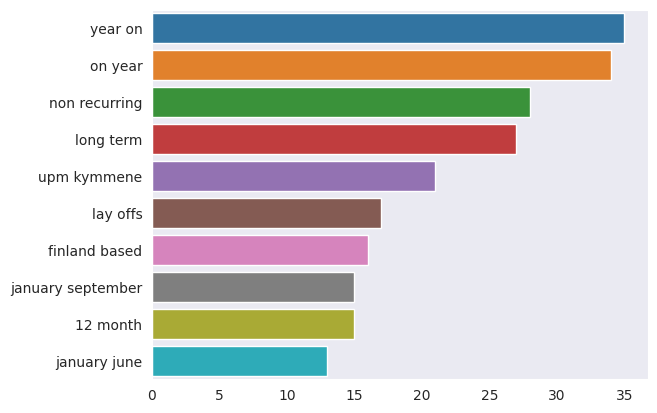

In [ ]:
x,y=map(list,zip(*top_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
top_trigrams = get_top_ngram(corpus, n=3)

<Axes: >

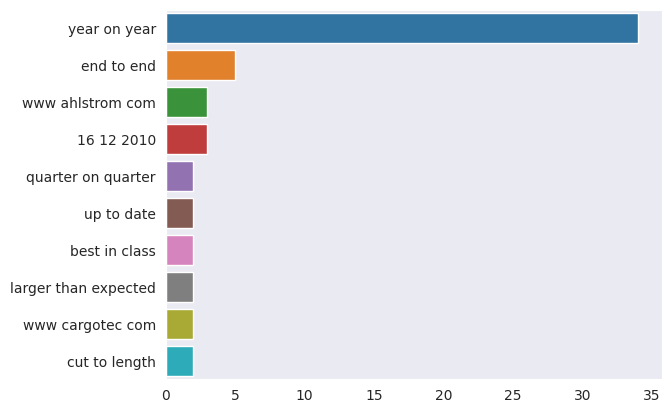

In [ ]:
x,y=map(list,zip(*top_trigrams))
sns.barplot(x=y,y=x)

##Wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
stopwords = stopwords.words('english')

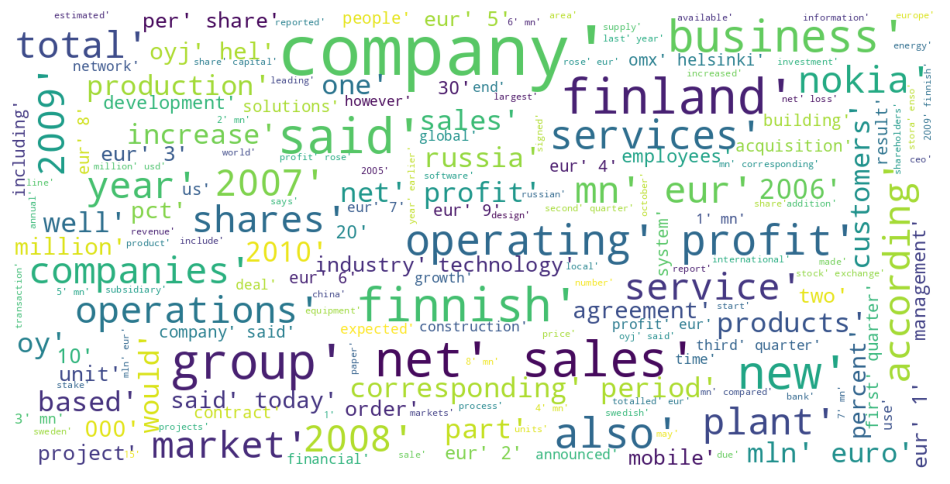

In [ ]:
def show_wordcloud(corpus):
  """
  Given the corpus, generate and plot the Wordcloud.

  param corpus: (list) containing all words in the dataset.
  """
  #Specify the type of WordCloud we want
  wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=200,
      max_font_size=30,
      scale=3,
      random_state=42)

  #Generate the WordCloud.
  wordcloud=wordcloud.generate(str(corpus))

  #Plot the WordCloud.
  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')

  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(corpus)

From the Wordcloud, we can clearly see that we are dealing with financial data. Big words are 'company', 'profit', 'business', 'sales' and 'shares', which all clearly indicate business-related content. It is also interesting to see that years play a big role in financial news. This could be because financial news is often about comparing profits/sales from this year with previous years.